In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [4]:
# Display basic information

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [7]:
# Find missing values

missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dty

In [8]:
# Optionally fill or drop missing values
data = data.fillna(0) 

In [9]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


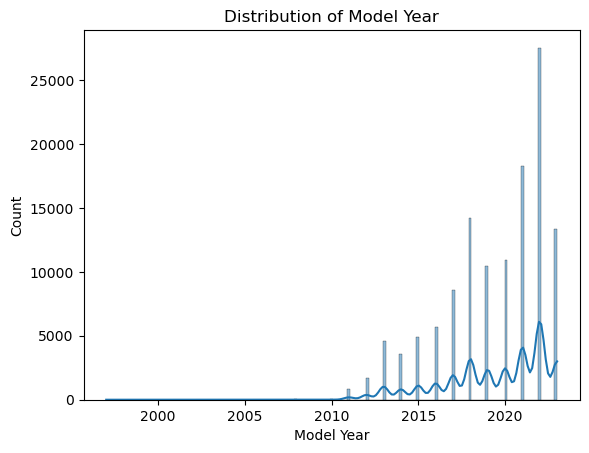

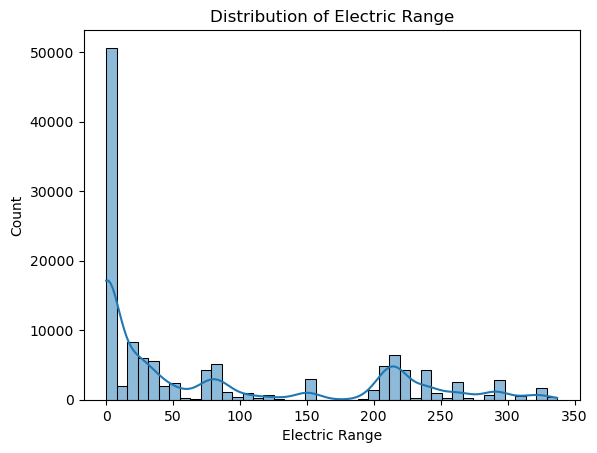

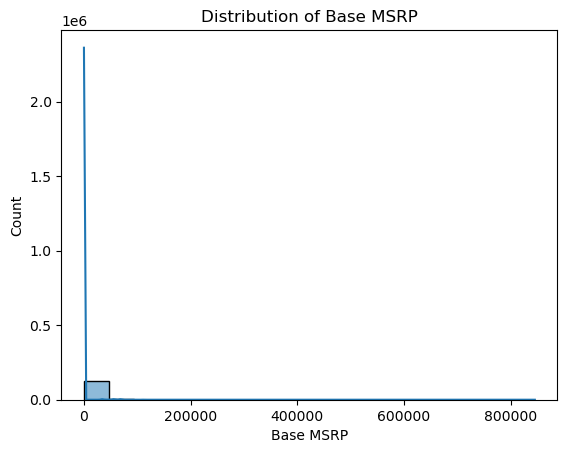

In [10]:
# Visualize distributions of numerical columns
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP']
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [15]:
data["Base MSRP"].max()

845000

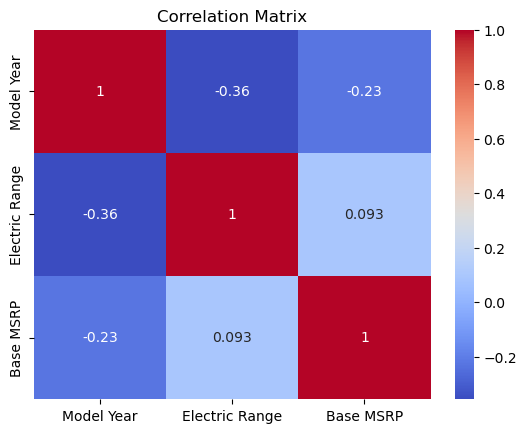

In [16]:
# Correlation matrix of numerical columns
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

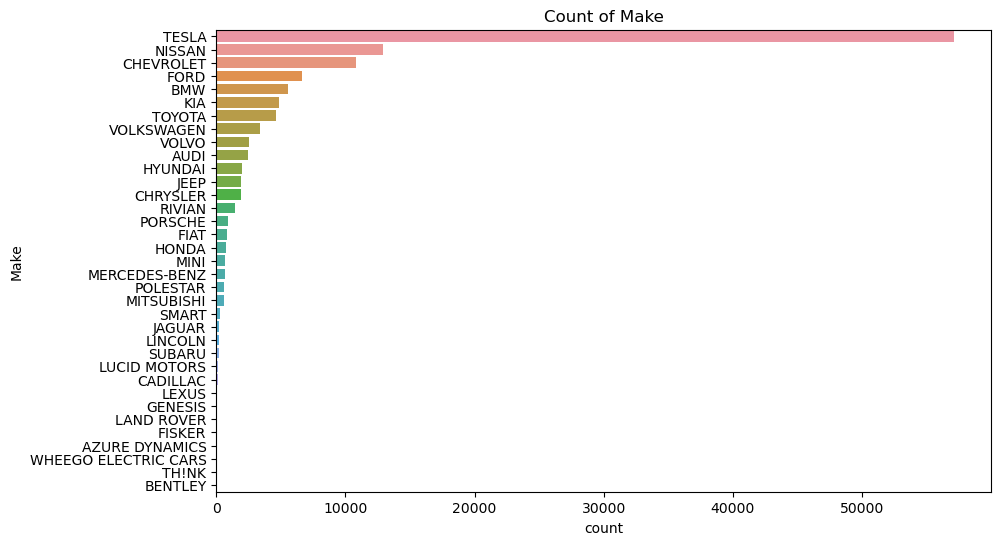

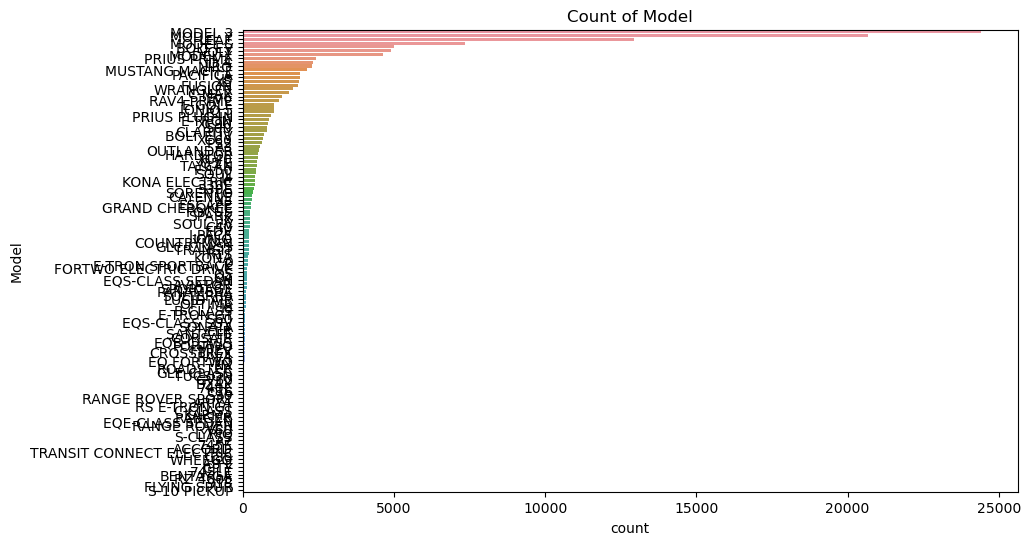

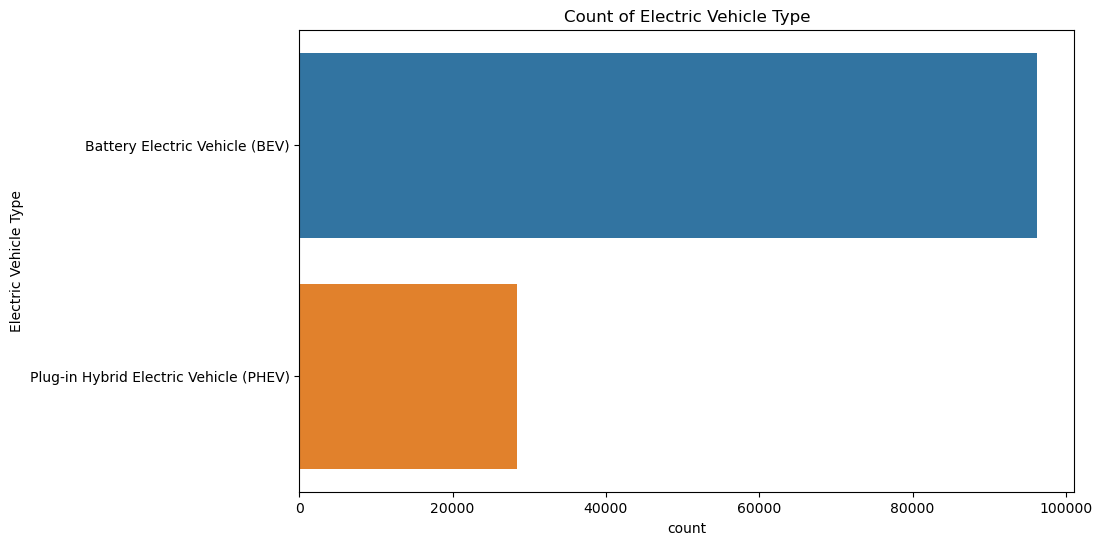

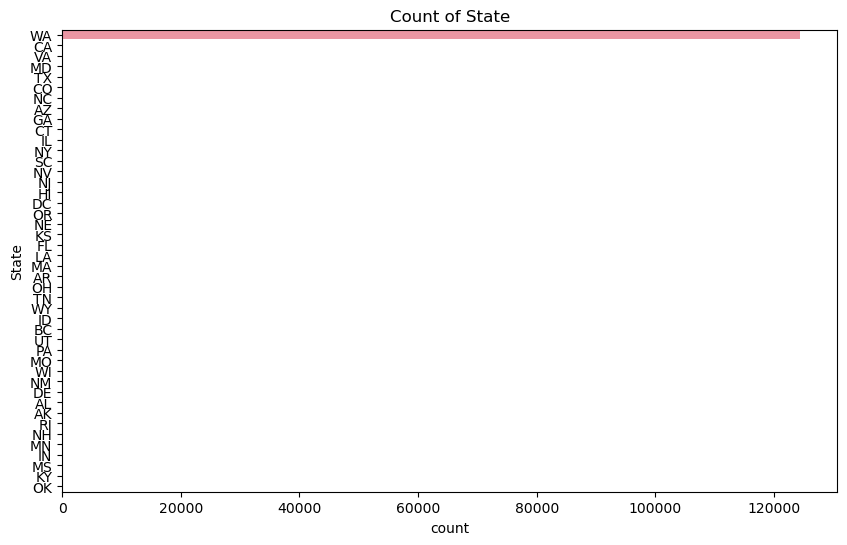

In [19]:
# Countplot for categorical variables
categorical_cols = ['Make', 'Model', 'Electric Vehicle Type', 'State']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

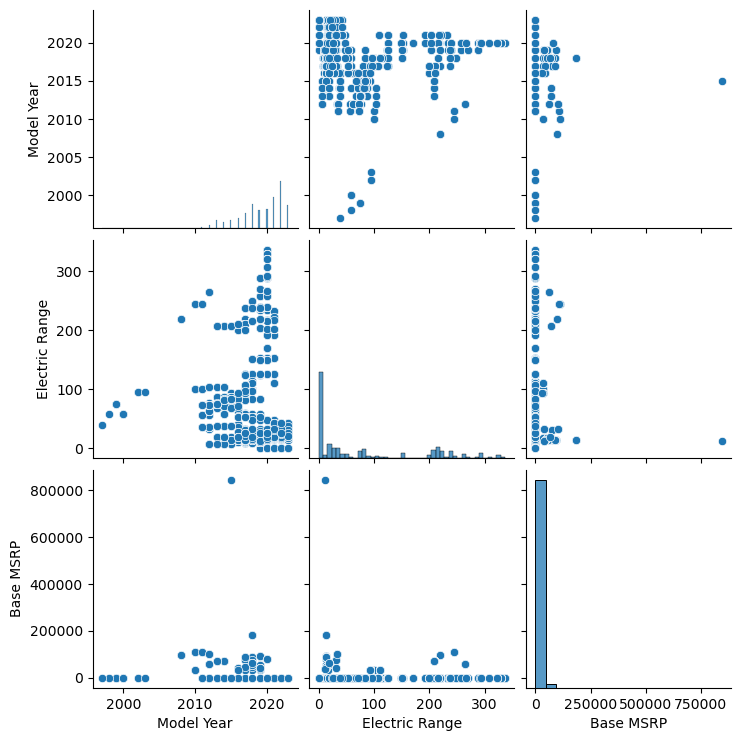

In [20]:
# Pairplot to see interactions between numerical variables
sns.pairplot(data[numerical_cols])
plt.show()

In [21]:
# Summary of key insights
print("Summary of Key Insights:")
print(f"Total number of unique VINs: {data['VIN (1-10)'].nunique()}")
print(f"Top 5 vehicle makes:\n{data['Make'].value_counts().head()}")
print(f"Top 5 vehicle models:\n{data['Model'].value_counts().head()}")
print(f"Average Electric Range: {data['Electric Range'].mean():.2f} miles")
print(f"Average Base MSRP: ${data['Base MSRP'].mean():.2f}")

Summary of Key Insights:
Total number of unique VINs: 8340
Top 5 vehicle makes:
TESLA        57124
NISSAN       12946
CHEVROLET    10836
FORD          6680
BMW           5578
Name: Make, dtype: int64
Top 5 vehicle models:
MODEL 3    24409
MODEL Y    20673
LEAF       12924
MODEL S     7345
BOLT EV     4988
Name: Model, dtype: int64
Average Electric Range: 79.47 miles
Average Base MSRP: $1556.07
